# Hw1 
(a) Write a function in MATLAB or Python (with a Jupyter Notebook
containing the results), to implement the SIR model, using the following
differential equations:

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

(b) Using initial values S(0) = 999, I(0) = 1, and R(0) = 0, and parameters
β = 0.3 and γ = 0.1, simulate the model for 150 days and plot S, I, and R
vs time.

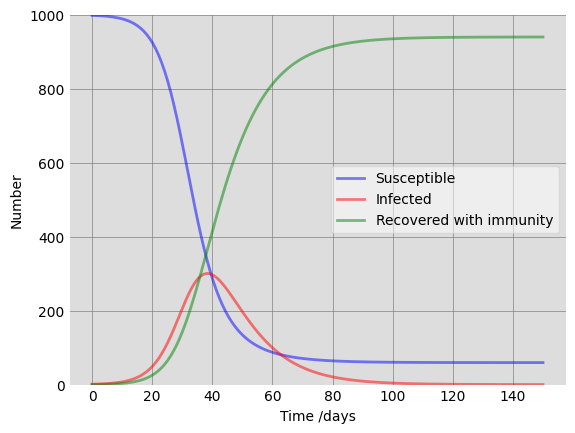

In [3]:
# Initial number of infected and recovered individuals, everyone else is susceptible to infection initially.
I0 = 1
R0 = 0
# Total population, N.
N = 999 + I0 + R0
# Initial number of susceptible individuals
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta = 0.3
gamma = 0.1 
# A grid of time points (in days)
t = np.linspace(0, 150, 150)

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number')
ax.set_ylim(0, N)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(True, which='major', linestyle='-', linewidth='0.5', color='gray')  # Corrected line for grid
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

















(c) Discuss the dynamics of the pandemic. At what point does the number of
infected individuals peak? How does the basic reproductive number
R0 = β/γ influence the dynamics?

In [4]:
peak_infected = max(I)
peak_day = t[list(I).index(peak_infected)]

In [5]:
peak_day

38.255033557046985

The infection starts with a few infected individual, because the majority of the population is susceptible (999 individuals), the disease spreads quickly.  As time progresses, the number of infected individuals I grows, leading to more new infections. This is the phase where the infection spreads most rapidly. The number of infected individuals reaches a maximum on 38th day, when the rate of new infections equals the rate of recovery. fter the peak, the rate of new infections slows down as fewer individuals are susceptible, and the number of recoveries starts to outpace new infections. The infected population I begins to decrease. 

If R0>1, each person with the disease infects more than one other person, leading to a potential epidemic or pandemic; Ro= 1 ,  the disease is likely to stay at a constant level within the population. R0 <1, ach person with the disease infects fewer than one other person, leading to a decline in the number of infected individuals over time. A higher R0 would lead to a faster spread and a higher peak of infection.

Hw2 

(a) Implement the susceptible-exposed-infectious-recovered (SEIR) model,
introducing an “Exposed” compartment and considering birth and death
rates, where E is the exposed population; σ is the rate at which exposed
individuals become infectious; μ is the natural birth and death rate; and N is
the total population, N = S + E + I + R.

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
beta = 0.3  # Transmission rate
gamma = 0.1  # Recovery rate
sigma = 1/5  # Rate of exposed individuals becoming infectious (1/latent period)
mu = 1/(70*365)  # Natural birth and death rate (assuming an average lifespan of 70 years)

# SEIR model differential equations.
def seir_model(t, y, N, beta, gamma, sigma, mu):
    S, E, I, R = y
    dSdt = mu*N - beta*S*I/N - mu*S
    dEdt = beta*S*I/N - (sigma + mu)*E
    dIdt = sigma*E - (gamma + mu)*I
    dRdt = gamma*I - mu*R
    return dSdt, dEdt, dIdt, dRdt

(b) Simulate this model for 365 days using initial values S(0) = 990, E(0) = 9,
I(0) = 1, R(0) = 0, and parameters β = 0.3, γ = 0.1, σ = 0.2, and
μ = 0.01. Plot the compartment variables against time.

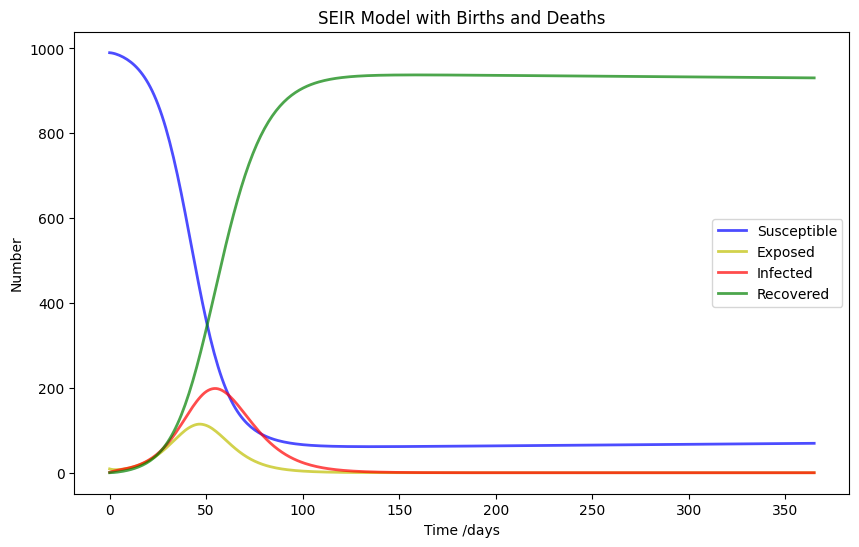

In [7]:
N = 1000
S0 = 990  
E0 = 9    # Initial number of exposed individuals
I0 = 1   
R0 = 0    

# Initial conditions vector
y0 = S0, E0, I0, R0

# A grid of time points (in days)
t = np.linspace(0, 365, 365)  # Simulate for 365 days

# Integrate the SEIR equations over the time grid, t.
ret = solve_ivp(seir_model, [t.min(), t.max()], y0, args=(N, beta, gamma, sigma, mu), t_eval=t)

# Plot the data on three separate curves for S(t), E(t), I(t) and R(t)
plt.figure(figsize=(10,6))
plt.plot(ret.t, ret.y[0], 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(ret.t, ret.y[1], 'y', alpha=0.7, linewidth=2, label='Exposed')
plt.plot(ret.t, ret.y[2], 'r', alpha=0.7, linewidth=2, label='Infected')
plt.plot(ret.t, ret.y[3], 'g', alpha=0.7, linewidth=2, label='Recovered')
plt.title('SEIR Model with Births and Deaths')
plt.xlabel('Time /days')
plt.ylabel('Number')
plt.legend()
plt.show()


(c) Discuss how the introduction of an “Exposed” compartment and birth and
death rates affect the pandemic’s dynamics.

First,  "Exposed" compartment represents individuals who have been exposed to the disease but are not yet infectious. This creates a delay between when an individual is exposed and when they begin to contribute to the transmission of the disease (during the infectious period). This can slow the initial spread of the disease compared to the SIR model. Since exposed individuals are not immediately infectious, there is a latent period an lead to more complex dynamics and the potential for a more significant outbreak once these individuals become infectious.  
For bith and death rates,  introduces a continual turnover in the population. New susceptible individuals are born, and individuals in any compartment can die, independent of the disease dynamics. Conversely, if the disease causes death at a rate higher than the birth rate or if the infected die faster than they can spread the disease, it could lead to the extinction of the disease within the population. Over longer time scales, birth and death rates can significantly alter the demographics of the population, affecting the susceptible population size and thus the dynamics of the pandemic.